## Robust profiles of credit spreads


*Credit spreads* have become an important factor in setting U.S.
monetary policy according to the Fed Chairman who spoke at the
Federal Reserve Bank of Dallas on November 14, 2018
(see video at https://youtu.be/vftR_APuIBM).
They have become part of the toolbox which will influence
the future path of interest rates.

A **credit spread** is the difference in yields between two
types of debt instruments which differ by default risk
(that is, the failure of the debtor to pay interest and/or
any principal due). A good example is the difference in
yields between corporate bonds and Treasury bonds.
An investor expects to get additional compensation
for taking on default risk.

***How can default risk be calibrated and observed in credit markets?***
In this notebook, we examine two types of credit spreads:
mortgage and corporate. We derive a robust statistical technique to
profile such spreads which facilitates comparison and aggregation.
The unified profile gives a clear picture of composite
credit risk in the financial system, thus providing daily insight
into the health of the overall economy.

The unified profile could be useful for formulating policy
guidelines (e.g. postpone rate hikes if readings exceed +0.5\*MAD)
since the emphasis is not on basis point units in any particular
bond market, but rather a neutral baseline and a robust dispersion
measure called **MAD**, *Median Absolute Deviation*.

The utility of MAD is demonstrated in non-Gaussian situations
like the catastrophic Great Recession. Comparative insight
is gained by observing dimensionless risk proportionalities
across markets (rather than magnitudes expressed in terms of
basis points). We conclude by a convincing
visualization of ***unified credit profile*** in the U.S. economy,
and hints for policy rules.

---

Appendix 1 summarizes this notebook as a Python function called
`creditprof()`. URL shortcut to this notebook: https://git.io/creditprof


*Dependencies:*

- fecon236 >= 10.8.0, source code, https://github.com/MathSci/fecon236
- Data herein downloadable from FRED database for U.S. Federal Reserve Bank.
     
*CHANGE LOG*

    2018-12-02  First draft version.

In [1]:
import fecon236 as fe

In [2]:
#  PREAMBLE-p10.18.0714 :: Settings, https://git.io/236pa
from __future__ import absolute_import, print_function, division
fe.system.specs()
%load_ext autoreload
%autoreload 2
#       Use 0 to disable autoreload when a module is modified.
#  NOTEBOOK DISPLAY OPTIONS...
fe.pd.set_option('display.notebook_repr_html', False)
#       Represent pandas DataFrames as text; not HTML representation.
from IPython.display import HTML  # Useful for snippets from web.
#  e.g. HTML('<iframe src=https://en.wikipedia.org/?useformat=mobile \
#            width=700 height=350></iframe>')
from IPython.display import Image
#  e.g. Image(filename='holt-winters-equations.png', embed=True)
#                  url= Also works instead of filename.
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True",
#  which will display results in secondary notebook pager frame in a cell.
%matplotlib inline
#  Generate PLOTS inside notebook, "inline" generates static png,
#  whereas "notebook" argument allows interactive zoom and resize.

 !:  Code for this project straddles python27 and python3.
 ::  Python 2.7.15
 ::  IPython 5.7.0
 ::  jupyter_core 4.4.0
 ::  notebook 5.4.0
 ::  matplotlib 1.5.1
 ::  numpy 1.11.3
 ::  scipy 1.0.0
 ::  statsmodels 0.8.0
 ::  sympy 1.1.1
 ::  pandas 0.22.0
 ::  pandas_datareader 0.6.0
 ::  fecon236 10.8.0
 ::  Repository: fecon235 v6.18.0623 develop
 ::  Timestamp: 2018-12-03T02:03:22Z


### Mortgage credit spread

This credit spread in its *classic* form took the difference in
rates between 30-year fixed rate mortgages and 30-year Treasury bonds.
However, the maturity of a "long bond" is
currently taken to be 10 years in global finance.
Hence, we shall examine the spread between the
"**Freddie Mac 15-Year Fixed Rate Mortgage Average**"
and U.S. Treasury 10-year bonds.

In [3]:
#  Freddie Mac series is updated weekly on Thursdays,
#  so we shall apply daily interpolation to be
#  frequency compatible with the Treasury series:
fmac = fe.daily(fe.get('MORTGAGE15US'))

In [4]:
#  Retrieve daily rates for 10-year Treasuries...
ty = fe.get(fe.d4bond10)

#  ... then compute the MORTGAGE CREDIT SPREAD:
mort = fe.todf(fmac - ty)

In [5]:
#  We note mort extends back to 1991-08-30:
start = '1991-08-30'

In [6]:
#  The underlying data has DAILY frequency,
#  but for visualization purposes we shall
#  PLOT on MONTHLY frequency which produces
#  clear lines over several decades 
#  (otherwise, the lines will smear over finer intervals.)

def plotmonth(dfy, start=start):
    fe.plot(fe.monthly(dfy[start:]))

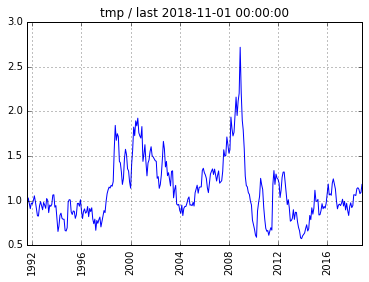

In [7]:
#  The y-scale is in (basis points)/100
plotmonth(mort)

### Profiling: rescaling a spread with robust baseline

Credit spreads are generally expressed in basis points.
However, the impact of 100 basis points on a mortgage spread
is quite different than on a corporate bond spread.
For example, mortgages are generally collaterized (by the
property and the building), whereas many corporate bonds are
not secured (esp. those of speculative ratings).

We first propose to shift the median to zero,
then to rescale the spread using a unitless
measure called MAD, Median Absolute Deviation.

A zero median allows us readily identify a
neutral baseline, distinguishing abundant
from sparse credit flows in the economy.
The constructed baseline is robust in the
sense that large deviations are not given
undue weight (in contrast to the statistical mean).

The MAD dispersion measure is also L1 robust,
unlike L2 variance and its square root which is
known as the standard deviation.
Details are provided in the article embedded
in the next cell, as well, in the code comments
which follows.

We shall call a *robustly rescaled* credit spread, a "**credit profile**."

In [8]:
HTML('<iframe src=https://en.wikipedia.org/wiki/Median_absolute_deviation?useformat=mobile \
    width=700 height=350></iframe>')

In [9]:
fe.mad??

Signature: fe.mad(dfy)
Source:   
def mad(dfy):
    '''Median Absolute Deviation is a robust measure of dispersion:
    MAD = 0.67449*sigma if distribution is Gaussian, i.e.
    3*MAD is about 2*sigma; however, MAD is resilient to outliers,
    thus very useful in non-Gaussian situations.
    See https://en.wikipedia.org/wiki/Median_absolute_deviation
    '''
    dev = dfy - median(dfy)  # Deviations from median.
    #  MAD is defined as the median (not the mean)
    #  of absolute deviations from the data's median:
    return median(abs(dev))
File:      /media/yaya/virt18g/virt/dbx/Dropbox/ipy/fecon236/fecon236/tool.py
Type:      function


In [10]:
#  This function performs the profiling:
fe.madmen??

Signature: fe.madmen(dfy)
Source:   
def madmen(dfy):
    '''Rescale data as unitless MAD multiples, after shifting median to zero.
    The main character in the "Mad Men" series pretending to be Donald Draper
    is akin to our data pretending to be Gaussian, which we robustly unmask.
    [Cf. alternative normalize() where large deviations are squared.]
    '''
    dev = dfy - median(dfy)  # Deviations from median.
    return dev / mad(dfy)
File:      /media/yaya/virt18g/virt/dbx/Dropbox/ipy/fecon236/fecon236/tool.py
Type:      function


In [11]:
#  Profile the mortgage credit spread:
mortmad = fe.madmen(mort)

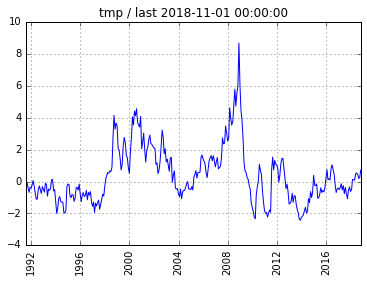

In [12]:
#  Here the y-scale uses MAD:
plotmonth(mortmad)

Profiling does not change the shape of the plot,
but readily highlights the internal proportionalities.

The huge credit distortion in the housing market
during the Great Recession is quite evident visually.
But that distortion does not in turn distort
our robust statistical measures.

For reference, +9\*MAD would register as a
*six-sigma* event if we had made traditional
Gaussian assumptions.

It is important to also note that credit spreads
are *asymmetric* in that the lower end is bounded.
This is because a risky bond will never yield
less than a Treasury bond of comparable tenor.

### Corporate credit spread

Here we examine the BAA10Y spread between **Moody's Seasoned Baa-rated
Corporate Bonds** (https://fred.stlouisfed.org/series/DBAA) and 10-year
Treasury Constant Maturity (https://fred.stlouisfed.org/series/DGS10).
Such corporate bonds are regarded as low investment grade, not junk.

In [13]:
#  FRED publishes this CORPORATE CREDIT SPREAD daily:
baa = fe.get('BAA10Y')

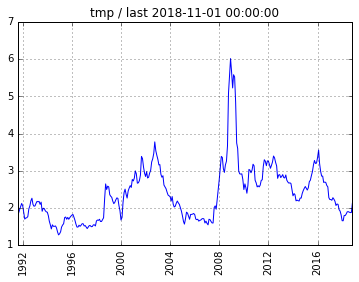

In [14]:
#  The y-scale is in (basis points)/100
plotmonth(baa)

From the chart above, it would be difficult to
visually estimate the median or the mean of the series,
that is to say, the "typical" middle baseline.
But that is remedied when spreads are profiled --
simply look for the zero median.

In [15]:
#  See section on Profiling:
baamad = fe.madmen(baa[start:])

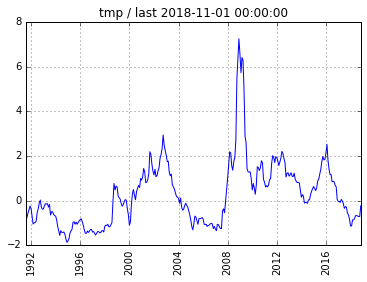

In [16]:
#  Here the y-scale uses MAD:
plotmonth(baamad)

Although the crisis during the Great Recession was ignited
by the blowout in *credit default swaps on mortgages*,
it is instructive to *visually see* that corporate credit spreads
suffered to the same extent when the measuring stick is historical MAD.

(The best data source for traded credit default swaps is unfortunately
not freely accessible, thus was ineligible for the fecon235 project.) 

Without profiling, that similarity would not be apparent,
since the peak of the mortgage credit spread was "only" about 270 basis points,
whereas the peak of the Baa corporate credit spread was about 600 basis points.

### Combining profiles for generality

The peaks in the mortgage and corporate credit profiles appear
vaguely similar on a long time scale, but at a local
time scale they can be vastly different. This is because
credit risk will vary in the *housing market* (according
to the home buyer's ability to make mortgage payments),
versus the *business environment* (where corporate profits
are required to satisfy debt obligations).

Each market also has its idiosyncratic issues regarding the
*supply* of the underlying debt obligations.
Such differences can be smoothed over by proper aggregation. 

*Which credit spread does a policy maker pay attention to?*
The statistical profiling puts credit spreads on comparable
terms. ***Thus we can aggregate profiles for generality to
observe credit default risks in the economy.***
(Think of the home buyer who depends on a corporate
entity for his job and personal income -- so the profiles
should be considered as integrable).

Other types of credit profiles could be appended here,
but for exposition purposes, we will simply average the
mortgage and corporate credit profiles.

In [17]:
#  Take the mean of all profiles:
madness = fe.todf((mortmad + baamad) / 2)

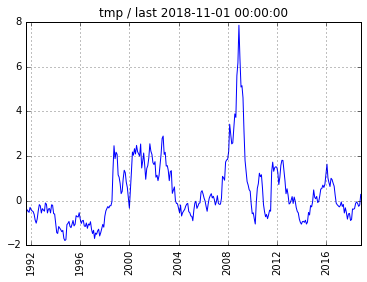

In [18]:
#  Here the y-scale uses averaged MAD:
plotmonth(madness)

In [19]:
#  Most RECENT values of UNIFIED CREDIT PROFILE, daily madness:
fe.tail(madness)

                   Y
T                   
2018-11-21  0.280590
2018-11-22  0.284908
2018-11-23  0.324748
2018-11-26  0.258021
2018-11-27  0.326707
2018-11-28  0.350256
2018-11-29  0.470755

#### Closing remarks

Elevated levels in credit profiles generally indicate
greater default risk, usually due to a weak economy,
and thus can provide additional signals for the
policy maker to decrease interest rates.
For example, 

- Levels approaching +1\*MAD can be considered as early warnings.
- Levels greater than +2\*MAD should be considered excessive.

Note how history is robustly encapulated in the Median Absolute Deviations,
without reference to basis point spreads which can wildly vary among debt markets.

### SUMMARY

(Please see top of this notebook.)

---

### APPENDIX 1: Unified credit profile, creditprof()

Jupyter notebooks are excellent for purposes of experimentation and
exposition, however, they are unsuitable for *direct* computation at
the commandline or within a program. We converted this notebook into a
script, using:

    $ jupyter nbconvert --to script fred-credit-spreads.ipynb

and then edited the resulting py file, to obtain a function
which outputs the Unified Credit Profile as a daily time-series
in pandas DataFrame format.

In [20]:
fe.creditprof??

Signature: fe.creditprof()
Source:   
def creditprof():
    '''Credit profile derived from mortgage and corporate credit spreads.'''
    #  Derivation in fecon235/nb/fred-credit-spreads.ipynb
    #  See https://git.io/creditprof
    #  First, note the oldest start date common among all series herein:
    start = '1991-08-30'
    #  ----- MORTGAGE CREDIT SPREAD
    #  Freddie Mac 15-Year Fixed Rate Mortgage v. Treasury 10-year bond.
    #  Freddie Mac series is updated weekly on Thursdays,
    #  so we apply daily interpolation to be
    #  frequency compatible with the other series in this function:
    fmac = daily(get('MORTGAGE15US'))
    #  Retrieve daily rates for 10-year Treasuries...
    ty = get(d4bond10)
    #  ... then compute the mortgage spread:
    mort = todf(fmac - ty)
    #  Profile the mortgage credit spread:
    mortmad = madmen(mort)
    #  ----- CORPORATE BOND SPREAD
    #  Examine daily BAA10Y spread between Moody's Seasoned Baa-rated
    #  Corporate Bonds and 10-y

In [21]:
dfappendix = fe.creditprof()

In [22]:
#  Access pandas, and test for equality, up to 4 decimal places:
fe.pd.testing.assert_frame_equal(madness, dfappendix, check_less_precise=4)

In case of code revisions, it is always a good idea to check for
consistency between the notebook and its summary function.
If no errors were returned in the previous cell: TEST PASSED.

---

### Questions or bugs?

- Chat with fellow users at Gitter: https://gitter.im/rsvp/fecon235

- Chat with fellow developers at Gitter: https://gitter.im/MathSci/fecon236


- Report issues regarding our Jupyter notebooks at https://github.com/rsvp/fecon235/issues

- Report issues regarding our Python code at https://github.com/MathSci/fecon236/issues

- Please see https://git.io/econ for orientation and installation details.